<a href="https://colab.research.google.com/github/HorizonRuler/Lunar-South-Pole-Oxygen-Pipeline-Model/blob/main/fluid_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 2 kg/hour flow rate (ṁ) of (assumed liquid) oxygen according to [proposal](https://www.nextbigfuture.com/2023/11/lunar-south-pole-oxygen-pipeline.html) for a 5 km (L) pipeline
* assumed liquid once it becames a gas [the density is dependent on the pressure and the temperature](https://en.wikipedia.org/wiki/Density#Changes_of_density), which changes throughout the pipe and the day
* NASA has a 900 PSI (6.205e+6 Pa) pump according to [this report from 1975](https://ntrs.nasa.gov/api/citations/19760008376/downloads/19760008376.pdf), I'm not sure what the expected pressure nowadays would be
* Liquid oxygen has a density (p) of 1141 kg/m^3
* P=8L(ṁ)^2/(p𝜋^2)*f/d^5 where d is pipe diameter after some conversions from the equation [here](https://en.wikipedia.org/wiki/Darcy%E2%80%93Weisbach_equation#Pressure-loss_equation)
* f=64/Re for laminar flow (Re<2300) and according to [this](https://en.wikipedia.org/wiki/Darcy_friction_factor_formulae#Blasius_correlations)
f=0.3164/Re^¼ is a simple approximation for turbulent flow (4000<Re<100000)
* the [reynolds number](https://en.wikipedia.org/wiki/Reynolds_number) is dependent on the viscosity of the fluid but the [viscosity of liquid oxygen](https://www.engineeringtoolbox.com/oxygen-O2-dynamic-kinematic-viscosity-temperature-pressure-d_2081.html) varies with temperature and pressure. Given that temperature varies wildly on the moon and that we're not sure if our pipes are insulated or buried I can't give a good estimate of the temperature. Pressure varies throughout the pipe so it gots annoying. The [equation for viscosity I found (on page 10)](https://ntrs.nasa.gov/api/citations/19740023269/downloads/19740023269.pdf) isn't even for oxygen and depends on molecular collisions as a proxy for pressure, which requires values like relative velocity and impact parameter that I don't know how to get.
* TL;DR Assuming it's a liquid, the pressure looks fairly reasonable (around the NASA pump pressure earlier mentioned) for a reasonable 3 mm diameter pipe for most reynolds numbers (see below, the graph doesn't display orders of magnitude on the z axis for some reason) so I think we're fine.
* Although if the temperature changes drastically and we get oxygen gas (which we will with no insulation given [oxygen's phase diagram](https://www.researchgate.net/figure/Equilibrium-phase-diagram-of-oxygen-in-the-pressure-temperature-plane-The-saturation_fig1_41480817) and [the maximum moon temperature](https://science.nasa.gov/moon/weather-on-the-moon/)) all bets are off: I expect density and flow rates to change drastically throughout the day (which I assume already violates the 2 kg/hr requirement) as well as required pressures to potentially increase drastically because density decreases in a gas.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

reynolds_number, diameter = np.meshgrid(np.arange(100.0, 7000.0, 100.0),
                                        np.arange(0.0025, 0.0035, 0.0001))
coefficient = 8*5*1000*(2/3600)**2/(1141*math.pi**2)
pressure = coefficient * np.piecewise(reynolds_number,
                                      [reynolds_number<2300, reynolds_number>=4000],
                                      [lambda x: 64/x,
                                       lambda x: 0.3164/(x**(1/4))])/(diameter**5)
print(pressure)


[[7184714.6115972  3592357.3057986  2394904.8705324  1796178.6528993
  1436942.92231944 1197452.4352662  1026387.80165674  898089.32644965
   798301.6235108   718471.46115972  653155.87378156  598726.2176331
   552670.35473825  513193.90082837  478980.97410648  449044.66322482
   422630.27127042  399150.8117554   378142.87429459  359235.73057986
   342129.26721891  326577.93689078       0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.               0.
        0.               0.               0.          446633.22282905
   443884.5801685   441218.4861328   438630.58281594  436116.83701674
   433673.50930926  431297.12667289  428984.45820495  426732.49351102
   424538.42342899  422399.62279262  420313.63498292  418278.15805079
   416291.03222437  414350.2286395   412453.83915359  410600.06712086
   408787.2190231   407013.69686292  405277.99123831  

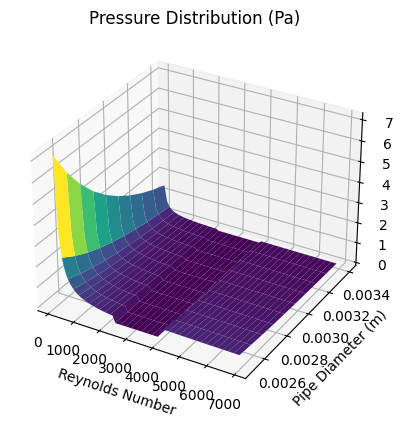

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(reynolds_number, diameter, pressure, cmap='viridis')
plt.xlabel('Reynolds Number')
plt.ylabel('Pipe Diameter (m)')
plt.title('Pressure Distribution (Pa)')
plt.show()